# Consctructing the data set

Importing the libraries and the files

In [36]:
# Importing the libraries

# Installing seaborn
!pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy as cp
import seaborn as sns

%matplotlib inline

In [13]:

# @hidden_cell
credentials_5 = {
  'auth_url':'https://identity.open.softlayer.com',
  'project':'object_storage_4ce2b21e_bf48_4e98_948d_2c0b81b8b84f',
  'project_id':'8160254a979c4ad99607776ef3ddb00b',
  'region':'dallas',
  'user_id':'5d948dc7699c4f8f8625676ee15ecb9b',
  'domain_id':'8d5c5723b93e4bdf8c5be53de58a2395',
  'domain_name':'1145017',
  'username':'admin_c24f02ccead8f3d4baea656ecbccd8e6e38d474d',
  'password':"""D!~GY/p7Z]b##1oV""",
  'container':'seminaire_data',
  'tenantId':'undefined',
  'filename':'Training_setY.csv'
}


In [14]:
# @hidden_cell
from io import BytesIO
import requests
import json

# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_4ce2b21ebf484e98948d2c0b81b8b84f(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage V3."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'admin_c24f02ccead8f3d4baea656ecbccd8e6e38d474d','domain': {'id': '8d5c5723b93e4bdf8c5be53de58a2395'},
            'password': 'D!~GY/p7Z]b##1oV'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return BytesIO(resp2.content)

features_train = pd.read_csv(get_object_storage_file_with_credentials_4ce2b21ebf484e98948d2c0b81b8b84f('seminaire_data', 'Training_setX.csv'))
features_train.head()
target_train = pd.read_csv(get_object_storage_file_with_credentials_4ce2b21ebf484e98948d2c0b81b8b84f('seminaire_data', 'Training_setY.csv'))
target_train.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [15]:
target_train = target_train.drop('id', axis = 1)
features_train = features_train.drop('id', axis = 1)

In [16]:
data_train = pd.concat([features_train,target_train], axis = 1)

In [17]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 40 columns):
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
recorded_by              59400 non-null object


### Contructing the new features of the data set :

In [18]:
# Transforming the features as described in the "exploring the data" part.
list_features_to_transform = ["installer","extraction_type","source","waterpoint_type_group","management","payment","water_quality","quantity","region","scheme_management","lga", "basin"]

In [23]:
data_new = pd.DataFrame()
for feature in list_features_to_transform :
    # f for functional
    temp = data_train[data_train["status_group"] == "functional"][feature].value_counts() / data_train[feature].value_counts()
    data_new[feature + "_f"] = temp[data_train[feature].tolist()].tolist()
    # fnr for functional needs repair
    temp = data_train[data_train["status_group"] == "functional needs repair"][feature].value_counts() / data_train[feature].value_counts()
    data_new[feature + "_fnr"] = temp[data_train[feature].tolist()].tolist()

In [24]:
data_new.head()

,installer_f,installer_fnr,extraction_type_f,extraction_type_fnr,source_f,source_fnr,waterpoint_type_group_f,waterpoint_type_group_fnr,management_f,management_fnr,...,quantity_f,quantity_fnr,region_f,region_fnr,scheme_management_f,scheme_management_fnr,lga_f,lga_fnr,basin_f,basin_fnr
0,0.606383,0.074468,0.599253,0.100859,0.622290,0.074966,0.576491,0.083986,0.504234,0.068902,...,0.652323,0.072320,0.782206,0.023234,0.515315,0.063436,0.774823,0.019504,0.653687,0.049164
1,0.846154,NaN,0.599253,0.100859,0.603922,0.136819,0.576491,0.083986,0.599540,0.099002,...,0.523234,0.095842,0.449975,0.030472,0.597911,0.028721,0.592179,0.037709,0.497658,0.096507
2,0.654412,0.132353,0.599253,0.100859,0.385671,0.036585,0.576491,0.083986,0.504234,0.068902,...,0.652323,0.072320,0.623500,0.060644,0.515315,0.063436,0.581169,0.016234,0.600895,0.053356
3,0.536036,0.040541,0.551217,0.047649,0.489571,0.044334,0.576491,0.083986,0.504234,0.068902,...,0.025136,0.005924,0.302890,0.072832,0.515315,0.063436,0.265823,NaN,0.371689,0.072557
4,0.555556,0.044444,0.599253,0.100859,0.603922,0.136819,0.576491,0.083986,0.598341,0.065166,...,0.574074,0.102716,0.520808,0.091677,NaN,NaN,0.530480,0.058366,0.497658,0.096507


In [25]:
# Transforming the other features
data_new["amount_tsh"] = data_train["amount_tsh"]

In [26]:
# filling the Nan by -1
data_new["permit"] = data_train["permit"].fillna(-1).astype(int)

In [27]:
# replacing the date
data_new["age_pump"] = data_train["construction_year"].apply(lambda x : x - 1963 if x != 0 else -1)

In [28]:
# filling the Nan by -1
data_new["public_meeting"] = data_train["public_meeting"].fillna(-1).astype(int)

In [29]:
# including the target variable
data_new["target"] = data_train["status_group"].apply(lambda x : 0 if x == "functional" else (1 if x == "functional needs repair" else 2))

In [30]:
data_new.head()

,installer_f,installer_fnr,extraction_type_f,extraction_type_fnr,source_f,source_fnr,waterpoint_type_group_f,waterpoint_type_group_fnr,management_f,management_fnr,...,scheme_management_fnr,lga_f,lga_fnr,basin_f,basin_fnr,amount_tsh,permit,age_pump,public_meeting,target
0,0.606383,0.074468,0.599253,0.100859,0.622290,0.074966,0.576491,0.083986,0.504234,0.068902,...,0.063436,0.774823,0.019504,0.653687,0.049164,6000,0,36,1,0
1,0.846154,NaN,0.599253,0.100859,0.603922,0.136819,0.576491,0.083986,0.599540,0.099002,...,0.028721,0.592179,0.037709,0.497658,0.096507,0,1,47,-1,0
2,0.654412,0.132353,0.599253,0.100859,0.385671,0.036585,0.576491,0.083986,0.504234,0.068902,...,0.063436,0.581169,0.016234,0.600895,0.053356,25,1,46,1,0
3,0.536036,0.040541,0.551217,0.047649,0.489571,0.044334,0.576491,0.083986,0.504234,0.068902,...,0.063436,0.265823,NaN,0.371689,0.072557,0,1,23,1,2
4,0.555556,0.044444,0.599253,0.100859,0.603922,0.136819,0.576491,0.083986,0.598341,0.065166,...,NaN,0.530480,0.058366,0.497658,0.096507,0,1,-1,1,0


### Writting the new dataframe with transformed features :

In [79]:
data_new.to_csv("Transformed_features.csv")

In [80]:
# writting the data

In [81]:
from io import BytesIO  
import requests  
import json  
import pandas as pd

def put_file(credentials, local_file_name):  
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage V3."""
    f = open(local_file_name,'r')
    my_data = f.read()
    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': credentials['username'],'domain': {'id': credentials['domain_id']},
            'password': credentials['password']}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', credentials['container'], '/', local_file_name])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.put(url=url2, headers=headers2, data = my_data )
    print resp2

In [82]:
put_file(credentials_5, "Transformed_features.csv")

<Response [201]>


In [83]:
data_new

,installer_f,installer_fnr,extraction_type_f,extraction_type_fnr,source_f,source_fnr,waterpoint_type_group_f,waterpoint_type_group_fnr,management_f,management_fnr,...,scheme_management_fnr,lga_f,lga_fnr,basin_f,basin_fnr,amount_tsh,permit,age_pump,public_meeting,target
0,0.606383,0.074468,0.599253,0.100859,0.622290,0.074966,0.576491,0.083986,0.504234,0.068902,...,0.063436,0.774823,0.019504,0.653687,0.049164,6000,0,36,1,0
1,0.846154,NaN,0.599253,0.100859,0.603922,0.136819,0.576491,0.083986,0.599540,0.099002,...,0.028721,0.592179,0.037709,0.497658,0.096507,0,1,47,-1,0
2,0.654412,0.132353,0.599253,0.100859,0.385671,0.036585,0.576491,0.083986,0.504234,0.068902,...,0.063436,0.581169,0.016234,0.600895,0.053356,25,1,46,1,0
3,0.536036,0.040541,0.551217,0.047649,0.489571,0.044334,0.576491,0.083986,0.504234,0.068902,...,0.063436,0.265823,NaN,0.371689,0.072557,0,1,23,1,2
4,0.555556,0.044444,0.599253,0.100859,0.603922,0.136819,0.576491,0.083986,0.598341,0.065166,...,NaN,0.530480,0.058366,0.497658,0.096507,0,1,-1,1,0
5,0.542064,0.093208,0.551217,0.047649,0.594340,0.004717,0.576491,0.083986,0.504234,0.068902,...,0.063436,0.777778,NaN,0.600895,0.053356,20,1,46,1,0
6,0.729167,0.005208,0.569482,0.057766,0.489571,0.044334,0.617852,0.058840,0.504234,0.068902,...,0.063436,0.564626,0.018707,0.575723,0.071548,0,1,-1,1,2
7,0.542064,0.093208,0.664827,0.078612,0.494769,0.056883,0.617852,0.058840,0.599540,0.099002,...,NaN,0.552632,0.004785,0.483053,0.115361,0,1,-1,1,2
8,0.541667,0.020833,0.603333,0.032917,0.489571,0.044334,0.617852,0.058840,0.504234,0.068902,...,0.063436,0.348387,NaN,0.483053,0.115361,0,1,-1,1,2
9,0.555556,0.044444,0.664827,0.078612,0.494769,0.056883,0.617852,0.058840,0.504234,0.068902,...,NaN,0.530480,0.058366,0.497658,0.096507,0,1,-1,1,0


### Little correlation exploration

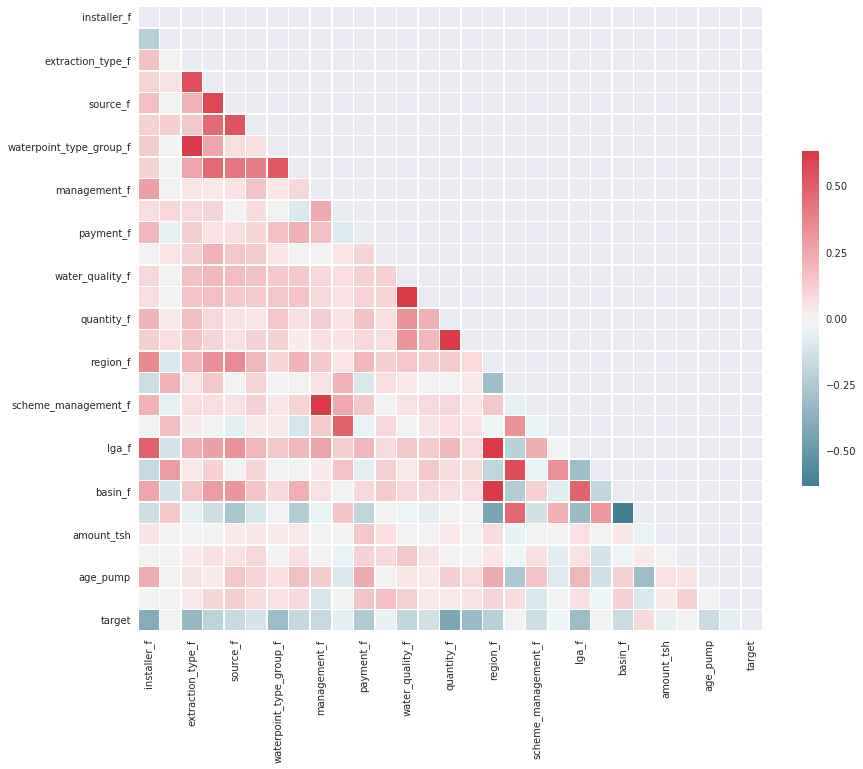

In [47]:
corr = data_new.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=2, yticklabels=2,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [ ]:
sns.pairplot(data_new)